In [2]:
!pip install qiskit
from qiskit import *

import torch
import torch.nn as nn

# Import from Qiskit Aer noise module
from qiskit.providers.aer import AerSimulator

import numpy as np

%matplotlib inline
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 9

In [7]:
nqubits = 3**2

backend = AerSimulator()

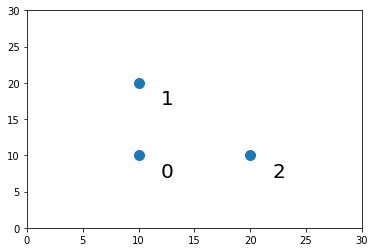

In [8]:
import random
import matplotlib.pyplot as plt
import math

# city_number = int(nqubits**0.5)
map_x = 30
map_y = 30

# def create_city(map_x, map_y):
#     x0 = random.randint(0, map_x)
#     y0 = random.randint(0, map_y)
#     return x0, y0


# def create_map(city_number, map_x, map_y):
#     city_list = []
#     for i in range(city_number):
#         while True: 
#             this_city = create_city(map_x, map_y)
#             if this_city in city_list:
#                 continue
#             else:
#                 city_list.append(this_city)
#                 break
                
#     return city_list

# my_map = create_map(city_number, map_x, map_y)
# print(my_map)


def plot_map(my_map, my_path=None):
    xs = [x[0] for x in my_map]
    ys = [x[1] for x in my_map]
    plt.scatter(xs, ys, s=100)
    plt.xlim(0, map_x)
    plt.ylim(0, map_y)
#     plt.figure(figsize=(5,5))
    for i in range(len(my_map)):
        plt.text(xs[i]+2, ys[i]-3, i, fontsize = 20)
    
    if my_path:
        for i in range(len(my_path)-1):
            plt.plot([my_map[my_path[i]][0], my_map[my_path[i+1]][0]], [my_map[my_path[i]][1], my_map[my_path[i+1]][1]], 'ro-')
    plt.show()

# my_path = None
# my_path = [0, 1, 2, 3, 0]
# my_map = [(10, 10), (10, 20), (22, 20)]
my_map = [(10, 10), (10, 20), (20, 10)]
plot_map(my_map)


def dist(p, q):
    return math.sqrt((float(p[0]) - float(q[0])) ** 2 + (float(p[1]) - float(q[1])) ** 2)

def to_distance_matrix(my_map):
    ret = []
    for i in range(len(my_map)):
        this_line = []
        for j in range(len(my_map)):
            this_line.append(dist(my_map[i], my_map[j]))
        ret.append(this_line)
            
    return ret

distance_matrix = to_distance_matrix(my_map)

[0, 2, 1, 0] 34.14213562373095


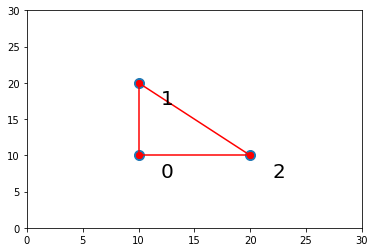

In [9]:
from sys import maxsize
from itertools import permutations
def brute_tsp(graph, s=0):
    vertex = []
    V = len(graph)
    for i in range(V):
        if i != s:
            vertex.append(i)

    min_path = maxsize
    next_permutation=permutations(vertex)
    for i in next_permutation:
        current_pathweight = 0
        k = s
        for j in i:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)
        if min_path == current_pathweight:
            ret_path = list(i)
    ret_path = [0] + ret_path + [0]
    return ret_path, min_path

s = 0
min_path, min_distance = brute_tsp(distance_matrix, s)
print(min_path, min_distance)

plot_map(my_map, min_path)

In [11]:
print(min_path)

[0, 2, 1, 0]


000000000      31768.591949959053
000000001      -3586.7471093683243
000000010      -3586.7471093683225
000000011      -10657.814921233803
000000100      -3586.747109368326
000000101      -10657.814921233807
000000110      -10657.814921233807
000000111      10555.388514362625
000001000      -3586.747109368327
000001001      -10657.814921233807
000001010      -38927.94403307198
000001011      -17714.740597475553
000001100      -38927.94403307198
000001101      -17714.740597475553
000001110      -45984.86970931373
000001111      3512.6049737446
000010000      -3586.7471093683253
000010001      -38927.94403307198
000010010      -10657.814921233805
000010011      -17714.740597475553
000010100      -38927.94403307198
000010101      -45984.86970931373
000010110      -17714.740597475553
000010111      3512.604973744598
000011000      -10657.814921233803
000011001      -17714.740597475553
000011010      -17714.740597475553
000011011      3512.6049737445996
000011100      -45984.86970931373
000

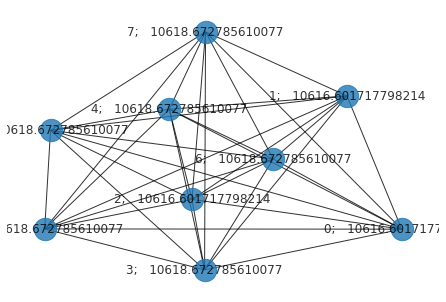

In [10]:
import networkx as nx
from itertools import combinations


def tsp_matrix_to_QUBO_matrix(w, penality=1000):
    n = len(w)
    Q = np.zeros((n*n, n*n))
    c = np.ones(n*n)
    A = np.max(w) * penality # penality
    c = c * (-4*A)

    # k, l is the index of Q
    # i, j, p, p_ is the index of w
    for k in range(n*n):
        for l in range(n*n):
            i = k // n
            j = l // n
            p = k % n 
            p_ = l % n 
            if  (p+1)%n == p_ and i != j:
                Q[k, l] = w[i, j] 
            elif p == p_:
                Q[k, l] = Q[k, l] + A
            elif i == j:
                Q[k, l] = Q[k, l] + A

    return Q, c

def QUBO_to_Ising(Q, c):
    J = Q/4
    h = (c + np.sum(Q, axis=1))/2

    for i in range(len(h)):
        J[i][i] += h[i]

    return J


distance_matrix = np.array(distance_matrix)
Q, c = tsp_matrix_to_QUBO_matrix(distance_matrix)

Ising_coeff = QUBO_to_Ising(Q, c)
Ising_coeff = Ising_coeff.tolist()


# Visualize the connectivity of the Ising model
G = nx.Graph()
pairs = []
for i in range(0, nqubits):
    G.add_node(i, weight = Ising_coeff[i][i])
    for j in range(i+1, nqubits):
        pairs.append((i, j, Ising_coeff[i][j]))
G.add_weighted_edges_from(pairs)
labels = {n: str(n) + ';   ' + str(G.nodes[n]['weight']) for n in G.nodes}
nx.draw(G, with_labels=True, labels=labels, alpha=0.8, node_size=500)


# @jit(nopython=True, parallel=True, fastmath=True)
def H_Ising(bitstring, Ising_coeff):
    spins = []
    for bit in bitstring:
        if bit == '0':
            spins.append(-1)
        elif bit == '1':
            spins.append(1)
    H = 0
    for i in range(0, nqubits):
        H += Ising_coeff[i][i]*spins[i]
        for j in range(nqubits):
            if i != j:
                H += Ising_coeff[i][j]*spins[i]*spins[j]
    return H


H_min = 10000
for i in range(2**len(Ising_coeff)):
    bitstring = np.binary_repr(i, nqubits)
    print(bitstring, "    ", H_Ising(bitstring, Ising_coeff))
    if H_Ising(bitstring, Ising_coeff) < H_min:
        H_min = H_Ising(bitstring, Ising_coeff)
        config_min = bitstring
print('The minimum value of the Hamiltonian:', H_min, 'the configuration:', config_min)

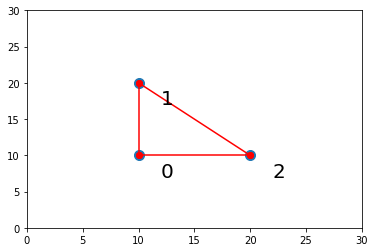

In [18]:
def output_path(num_city, config):
    city = []
    for i in range(num_city):
        for j in range(num_city):
            if config[3*i+j] == '1':
                city.append(j)
    city.append(city[0])

    return city

found_path = output_path(3, config_min)
plot_map(my_map, found_path)